In [1]:
import pandas as pd

file_path_variable= r"C:\Users\joody\Third Year\ML\widsdatathon2025\TRAIN_NEW\TRAIN_QUANTITATIVE_METADATA_new.xlsx"
file_path_target= r"C:\Users\joody\Third Year\ML\widsdatathon2025\TRAIN_NEW\TRAINING_SOLUTIONS.xlsx"
data_frame1= pd.read_excel(file_path_variable)
data_frame2= pd.read_excel(file_path_target)
data_frame= pd.merge(data_frame1, data_frame2,  on="participant_id", how="inner")

## Data Exploration and Cleaning

### Removing Duplicates 

In [2]:
data_frame.drop_duplicates(inplace=True)
data_frame

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,100.00,13.0,3.0,15.0,44.0,14.0,20.0,27.0,3.0,...,4.0,11.0,5.0,8.0,6.0,2.0,9.0,14.274127,1,0
1,00fV0OyyoLfw,92.27,14.0,3.0,12.0,35.0,25.0,28.0,30.0,5.0,...,4.0,13.0,5.0,8.0,7.0,3.0,8.0,NaN,1,0
2,04X1eiS79T4B,86.67,14.0,3.0,21.0,37.0,18.0,26.0,28.0,3.0,...,7.0,10.0,10.0,7.0,14.0,7.0,7.0,13.463381,0,1
3,05ocQutkURd6,93.34,14.0,3.0,11.0,42.0,15.0,20.0,28.0,0.0,...,0.0,3.0,0.0,3.0,2.0,2.0,6.0,9.572553,0,1
4,06YUNBA9ZRLq,0.00,14.0,8.0,12.0,35.0,22.0,12.0,24.0,6.0,...,7.0,15.0,8.0,9.0,8.0,1.0,4.0,6.654574,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zwjJWCRzKhDz,100.00,14.0,3.0,14.0,36.0,18.0,13.0,22.0,5.0,...,5.0,13.0,5.0,8.0,7.0,2.0,8.0,11.272986,0,1
1209,zwXD5v17Rx01,46.67,14.0,3.0,18.0,42.0,21.0,15.0,25.0,2.0,...,0.0,5.0,0.0,3.0,0.0,0.0,7.0,7.364020,1,0
1210,zWzLCi3NTBTd,-40.00,14.0,3.0,19.0,34.0,20.0,20.0,25.0,2.0,...,3.0,9.0,3.0,7.0,5.0,2.0,9.0,9.962126,1,1
1211,Zy9GTHDxUbXU,100.00,14.0,3.0,9.0,45.0,23.0,11.0,30.0,1.0,...,0.0,8.0,5.0,7.0,2.0,2.0,7.0,NaN,1,0


### Detect and Remove outliers 


In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt 

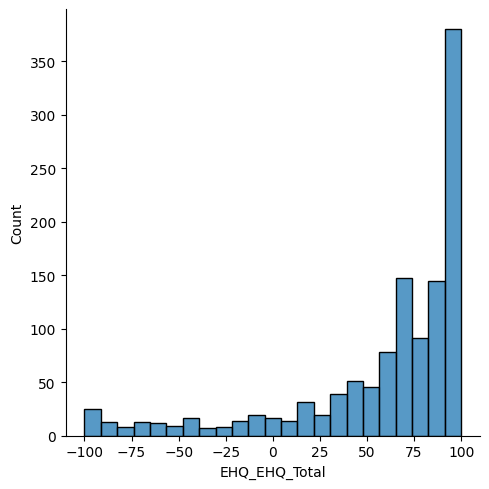

In [4]:
sns.displot(data_frame['EHQ_EHQ_Total'])

<Axes: ylabel='EHQ_EHQ_Total'>

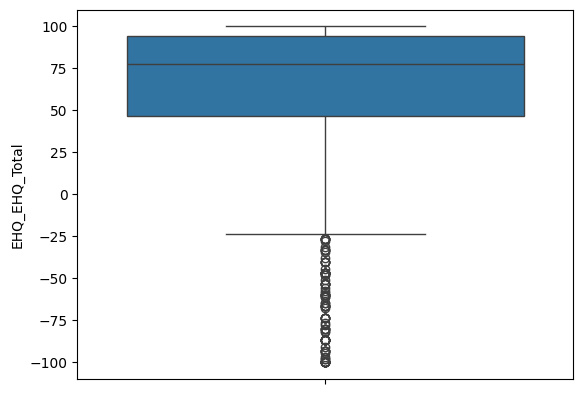

In [5]:
sns.boxplot(data_frame['EHQ_EHQ_Total'])

## Z score method

In [6]:
upper_limit=data_frame['EHQ_EHQ_Total'].mean()+3*data_frame['EHQ_EHQ_Total'].std()
lower_limit=data_frame['EHQ_EHQ_Total'].mean()-3*data_frame['EHQ_EHQ_Total'].std()
print('upper limit: ', upper_limit)
print('lower limit: ', lower_limit)
print("old data length:", len(data_frame))

upper limit:  208.74864190970118
lower limit:  -89.71914190970118
old data length: 1213


In [10]:

for col in data_frame:
    print(f"{col} max is {data_frame[col].max()} and min is {data_frame[col].min()}")


participant_id max is zwjJWCRzKhDz and min is 00aIpNTbG5uh
EHQ_EHQ_Total max is 100.0 and min is -100.0
ColorVision_CV_Score max is 14.0 and min is 0.0
APQ_P_APQ_P_CP max is 12.0 and min is 2.0
APQ_P_APQ_P_ID max is 28.0 and min is 5.0
APQ_P_APQ_P_INV max is 50.0 and min is 23.0
APQ_P_APQ_P_OPD max is 28.0 and min is 7.0
APQ_P_APQ_P_PM max is 37.0 and min is 5.0
APQ_P_APQ_P_PP max is 30.0 and min is 13.0
SDQ_SDQ_Conduct_Problems max is 10.0 and min is 0.0
SDQ_SDQ_Difficulties_Total max is 34.0 and min is 0.0
SDQ_SDQ_Emotional_Problems max is 10.0 and min is 0.0
SDQ_SDQ_Externalizing max is 20.0 and min is 0.0
SDQ_SDQ_Generating_Impact max is 10.0 and min is 0.0
SDQ_SDQ_Hyperactivity max is 10.0 and min is 0.0
SDQ_SDQ_Internalizing max is 17.0 and min is 0.0
SDQ_SDQ_Peer_Problems max is 9.0 and min is 0.0
SDQ_SDQ_Prosocial max is 10.0 and min is 0.0
MRI_Track_Age_at_Scan max is 21.564453 and min is 0.0
ADHD_Outcome max is 1 and min is 0
Sex_F max is 1 and min is 0


### Standraization using Z-score 

In [7]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

numeric_cols = data_frame.select_dtypes(include='number').columns


other_features = numeric_cols[:]

scaler_neg1_1 = MinMaxScaler(feature_range=(-1, 1))
scaler_0_1 = MinMaxScaler()

data_frame[other_features] = scaler_0_1.fit_transform(data_frame[other_features])

data_frame


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,00aIpNTbG5uh,1.00000,0.928571,0.1,0.434783,0.777778,0.333333,0.46875,0.823529,0.3,...,0.4,0.55,0.5,0.8,0.352941,0.222222,0.9,0.661929,1.0,0.0
1,00fV0OyyoLfw,0.96135,1.000000,0.1,0.304348,0.444444,0.857143,0.71875,1.000000,0.5,...,0.4,0.65,0.5,0.8,0.411765,0.333333,0.8,NaN,1.0,0.0
2,04X1eiS79T4B,0.93335,1.000000,0.1,0.695652,0.518519,0.523810,0.65625,0.882353,0.3,...,0.7,0.50,1.0,0.7,0.823529,0.777778,0.7,0.624332,0.0,1.0
3,05ocQutkURd6,0.96670,1.000000,0.1,0.260870,0.703704,0.380952,0.46875,0.882353,0.0,...,0.0,0.15,0.0,0.3,0.117647,0.222222,0.6,0.443904,0.0,1.0
4,06YUNBA9ZRLq,0.50000,1.000000,0.6,0.304348,0.444444,0.714286,0.21875,0.647059,0.6,...,0.7,0.75,0.8,0.9,0.470588,0.111111,0.4,0.308590,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,zwjJWCRzKhDz,1.00000,1.000000,0.1,0.391304,0.481481,0.523810,0.25000,0.529412,0.5,...,0.5,0.65,0.5,0.8,0.411765,0.222222,0.8,0.522758,0.0,1.0
1209,zwXD5v17Rx01,0.73335,1.000000,0.1,0.565217,0.703704,0.666667,0.31250,0.705882,0.2,...,0.0,0.25,0.0,0.3,0.000000,0.000000,0.7,0.341489,1.0,0.0
1210,zWzLCi3NTBTd,0.30000,1.000000,0.1,0.608696,0.407407,0.619048,0.46875,0.705882,0.2,...,0.3,0.45,0.3,0.7,0.294118,0.222222,0.9,0.461970,1.0,1.0
1211,Zy9GTHDxUbXU,1.00000,1.000000,0.1,0.173913,0.814815,0.761905,0.18750,1.000000,0.1,...,0.0,0.40,0.5,0.7,0.117647,0.222222,0.7,NaN,1.0,0.0


In [ ]:
print(len(data_frame))

708


### Handling missing values 

In [5]:
data_frame.isnull().sum()

participant_id                  0
EHQ_EHQ_Total                  13
ColorVision_CV_Score           23
APQ_P_APQ_P_CP                 12
APQ_P_APQ_P_ID                 12
APQ_P_APQ_P_INV                12
APQ_P_APQ_P_OPD                12
APQ_P_APQ_P_PM                 12
APQ_P_APQ_P_PP                 12
SDQ_SDQ_Conduct_Problems        9
SDQ_SDQ_Difficulties_Total      9
SDQ_SDQ_Emotional_Problems      9
SDQ_SDQ_Externalizing           9
SDQ_SDQ_Generating_Impact       9
SDQ_SDQ_Hyperactivity           9
SDQ_SDQ_Internalizing           9
SDQ_SDQ_Peer_Problems           9
SDQ_SDQ_Prosocial               9
MRI_Track_Age_at_Scan         360
ADHD_Outcome                    0
Sex_F                           0
dtype: int64

In [ ]:
for col in data_frame.select_dtypes(include='number').columns:
    data_frame.loc[:, col] = data_frame[col].fillna(data_frame[col].mean())   
    # First method --> we didnt use 

In [8]:
data_frame.isnull().sum()

participant_id                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
ADHD_Outcome                  0
Sex_F                         0
dtype: int64

In [8]:
# Female with ADHD
df_female_adhd = data_frame[(data_frame['ADHD_Outcome'] == 1) & (data_frame['Sex_F'] == 1)]

# Female without ADHD
df_female_no_adhd = data_frame[(data_frame['ADHD_Outcome'] == 0) & (data_frame['Sex_F'] == 1)]

# Male with ADHD
df_male_adhd = data_frame[(data_frame['ADHD_Outcome'] == 1) & (data_frame['Sex_F'] == 0)]

# Male without ADHD
df_male_no_adhd = data_frame[(data_frame['ADHD_Outcome'] == 0) & (data_frame['Sex_F'] == 0)]



In [9]:
# Fill missing values with the mean using 
for col in df_female_adhd.select_dtypes(include='number').columns:
    df_female_adhd.loc[:, col] = df_female_adhd[col].fillna(df_female_adhd[col].mean())

for col in df_female_no_adhd.select_dtypes(include='number').columns:
    df_female_no_adhd.loc[:, col] = df_female_no_adhd[col].fillna(df_female_no_adhd[col].mean())

for col in df_male_adhd.select_dtypes(include='number').columns:
    df_male_adhd.loc[:, col] = df_male_adhd[col].fillna(df_male_adhd[col].mean())

for col in df_male_no_adhd.select_dtypes(include='number').columns:
    df_male_no_adhd.loc[:, col] = df_male_no_adhd[col].fillna(df_male_no_adhd[col].mean())




# Concatenate the 4 groups back into one DataFrame
data_frame = pd.concat([df_female_adhd, df_female_no_adhd, df_male_adhd, df_male_no_adhd], ignore_index=True)

print(data_frame)



     participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0      0Hthz5IFXhpw        0.96135              1.000000             0.3   
1      0i2Tz2XUL4vm        0.93335              1.000000             0.1   
2      18K8e924IXlw        0.30000              1.000000             0.1   
3      19wn6hMP5wTE        0.95000              1.000000             0.1   
4      1exRTCGiAbwI        1.00000              1.000000             0.1   
...             ...            ...                   ...             ...   
1208   ZkakOF8J1wn7        1.00000              1.000000             0.1   
1209   zQHCPgcPgAbd        0.83935              1.000000             0.4   
1210   ZR9wQFUviEBu        0.06665              1.000000             0.1   
1211   ZrEocbbTa2lB        1.00000              1.000000             0.1   
1212   zwBG0rZ05Mcb        0.73335              0.928571             0.1   

      APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0           0

In [10]:
data_frame.isnull().sum()

participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
ADHD_Outcome                  0
Sex_F                         0
dtype: int64

In [10]:
# Export the DataFrame to a CSV file
data_frame.to_csv('Final Quantitave Training.csv', index=False)


In [12]:
file_path_variable= r"C:\Users\joody\Third Year\ML\widsdatathon2025\TRAIN_NEW\TRAIN_CATEGORICAL_METADATA_new.xlsx"
file_path_target= r"C:\Users\joody\Third Year\ML\widsdatathon2025\TRAIN_NEW\TRAINING_SOLUTIONS.xlsx"
data_frame1= pd.read_excel(file_path_variable)
data_frame2= pd.read_excel(file_path_target)
data_frame_cat= pd.merge(data_frame1, data_frame2,  on="participant_id", how="inner")


In [13]:
import pandas as pd
import os

# Copy dataframe to avoid modifying original
df_encoded = data_frame_cat.copy()

# Define columns and invalid values
special_codes = {
    "PreInt_Demos_Fam_Child_Ethnicity": [2, 3],           # Decline to specify, Unknown
    "PreInt_Demos_Fam_Child_Race": [10, 11]               # Unknown, Choose not to specify
}

# Get list of all columns except the first one
columns_to_encode = df_encoded.columns[1:]  # Skip first column

# Convert special columns to string for one-hot encoding
for col, invalid_vals in special_codes.items():
    if col in df_encoded.columns:  # Check if column exists
        df_encoded[col] = df_encoded[col].astype("Int64")  # Support NaNs in int columns
        df_encoded[col] = df_encoded[col].apply(lambda x: str(x) if pd.notnull(x) and x not in invalid_vals else 'all_zero_dummy')

# Fill any remaining NaNs in categorical columns with 'all_zero_dummy'
df_encoded[columns_to_encode] = df_encoded[columns_to_encode].fillna('all_zero_dummy')

# Convert only the columns we want to encode to string
df_encoded[columns_to_encode] = df_encoded[columns_to_encode].astype(str)

# One-hot encode only the specified columns (all except first)
df_dummies = pd.get_dummies(df_encoded[columns_to_encode])

# Combine first column with encoded columns
df_encoded = pd.concat([df_encoded.iloc[:, 0], df_dummies], axis=1)

# Remove dummy columns corresponding to 'all_zero_dummy'
for col in special_codes:
    dummy_col = f"{col}_all_zero_dummy"
    if dummy_col in df_encoded.columns:
        df_encoded.drop(dummy_col, axis=1, inplace=True)

# Create directory if it doesn't exist
os.makedirs("encoded_data_w", exist_ok=True)

# Save to CSV
df_encoded.to_csv("encoded_data_w/tID.csv", index=False)


    